In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('./input_data/Acoustic_Extinguisher_Fire_Dataset.xlsx')
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [5]:
df.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [6]:
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [7]:
df.corr()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
SIZE,1.000000e+00,-2.437871e-15,-6.125585e-15,1.677898e-16,9.978281e-17,-0.096947
DISTANCE,-2.437871e-15,1.000000e+00,-2.385897e-01,-7.074906e-01,-2.452947e-17,-0.644051
DESIBEL,-6.125585e-15,-2.385897e-01,1.000000e+00,3.769153e-01,5.617409e-01,0.203970
AIRFLOW,1.677898e-16,-7.074906e-01,3.769153e-01,1.000000e+00,-2.120462e-01,0.760628
FREQUENCY,9.978281e-17,-2.452947e-17,5.617409e-01,-2.120462e-01,1.000000e+00,-0.244203
STATUS,-9.694718e-02,-6.440506e-01,2.039698e-01,7.606279e-01,-2.442030e-01,1.000000


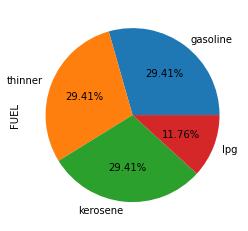

In [8]:
df['FUEL'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
oe = OrdinalEncoder()
df['FUEL'] = oe.fit_transform(df[['FUEL']])

In [11]:
oe.categories_

[array(['gasoline', 'kerosene', 'lpg', 'thinner'], dtype=object)]

In [12]:
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0.0,10,96,0.0,75,0
1,1,0.0,10,96,0.0,72,1
2,1,0.0,10,96,2.6,70,1
3,1,0.0,10,96,3.2,68,1
4,1,0.0,10,109,4.5,67,1


In [13]:
from scipy.stats import skew

Col name: SIZE
Skewness: 0.2786998636581806


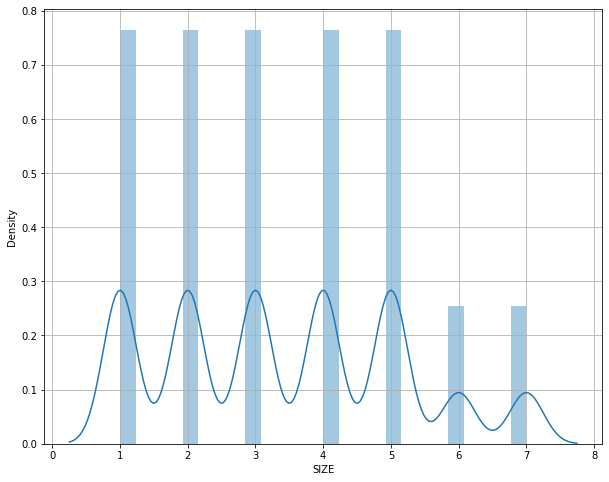

Col name: FUEL
Skewness: 0.20959140221588837


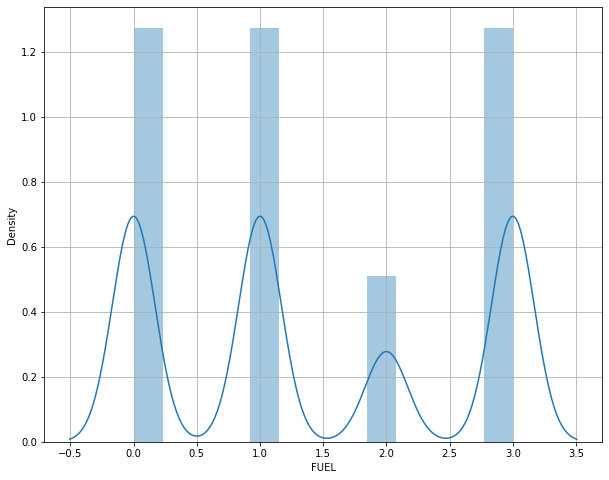

Col name: DISTANCE
Skewness: 0.0


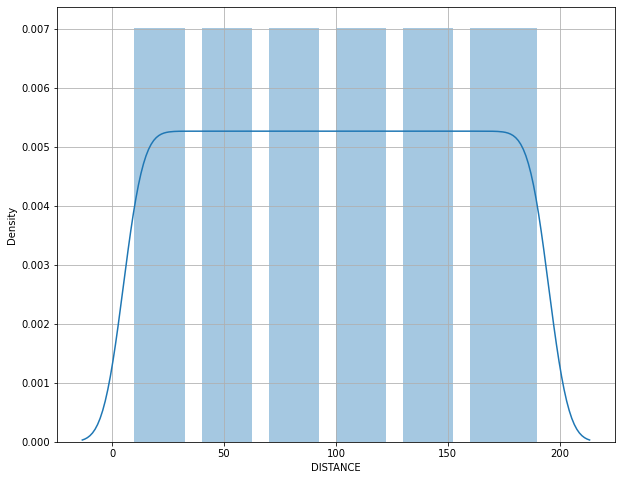

Col name: DESIBEL
Skewness: -0.17903195807888958


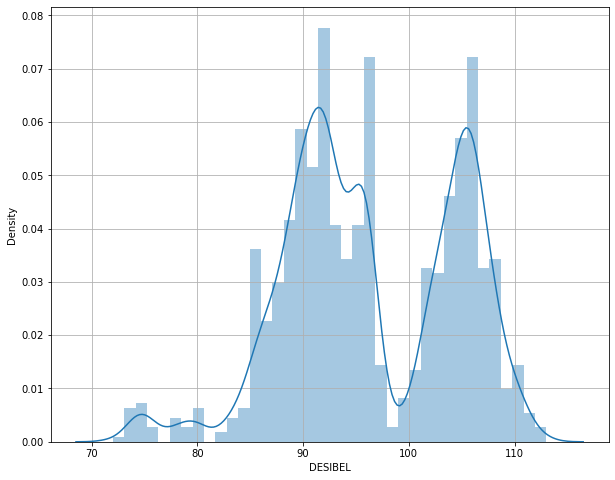

Col name: AIRFLOW
Skewness: 0.24434745944124117


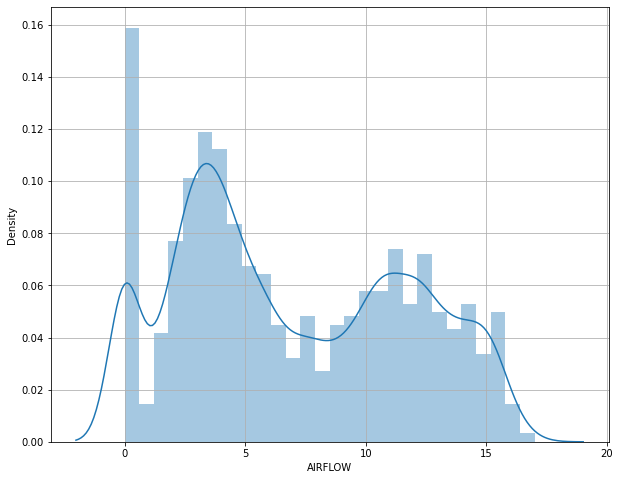

Col name: FREQUENCY
Skewness: 0.4348548916349596


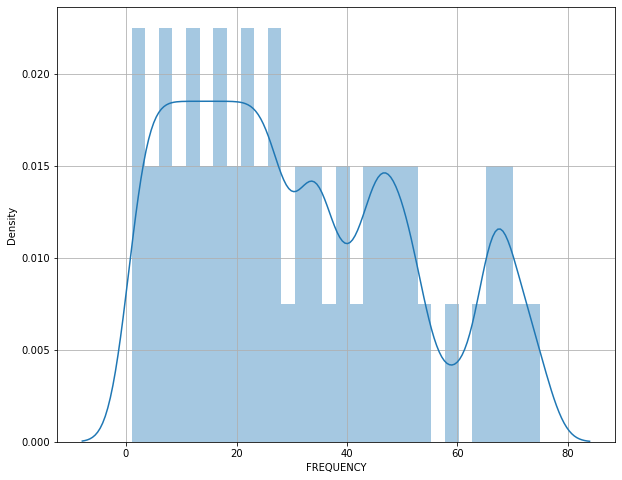

Col name: STATUS
Skewness: 0.008714679678955612


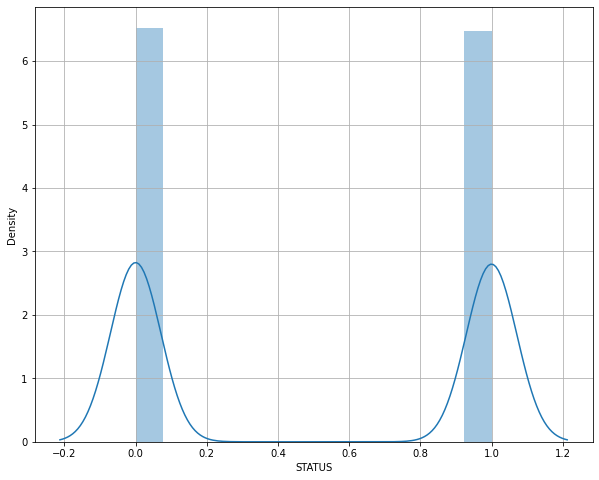

In [14]:
for col in df:
    print(f'Col name: {col}')
    print(f'Skewness: {skew(df[col])}')
    
    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    plt.grid(True)
    plt.show()
    

In [15]:
df.corr()['STATUS'].sort_values()

DISTANCE    -0.644051
FREQUENCY   -0.244203
SIZE        -0.096947
FUEL        -0.019384
DESIBEL      0.203970
AIRFLOW      0.760628
STATUS       1.000000
Name: STATUS, dtype: float64

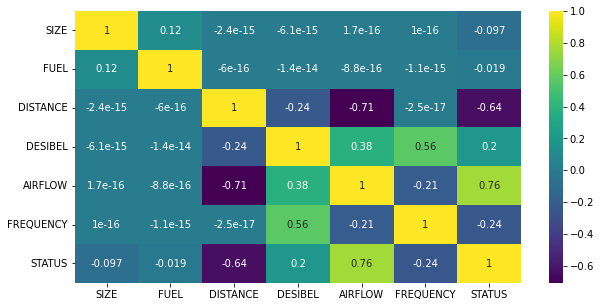

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

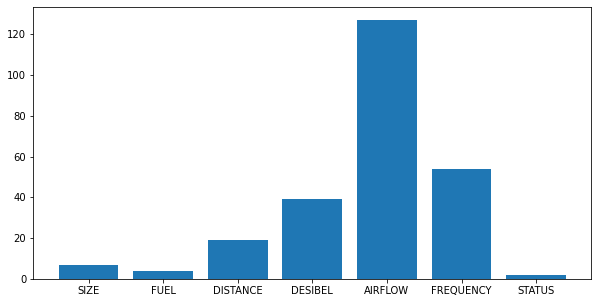

In [18]:
plt.figure(figsize=(10,5))
plt.bar(df.columns, df.nunique())
plt.show()

In [19]:
df.columns

Index(['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY',
       'STATUS'],
      dtype='object')

In [20]:
x = df.iloc[:,:-1]
x.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0.0,10,96,0.0,75
1,1,0.0,10,96,0.0,72
2,1,0.0,10,96,2.6,70
3,1,0.0,10,96,3.2,68
4,1,0.0,10,109,4.5,67


In [21]:
y = df.iloc[:, -1]
y.head()

0    0
1    1
2    1
3    1
4    1
Name: STATUS, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
st_sc = StandardScaler()
X_train = st_sc.fit_transform(X_train)
X_test = st_sc.fit_transform(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
from xgboost import XGBClassifier

In [29]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2614
           1       0.98      0.97      0.97      2619

    accuracy                           0.97      5233
   macro avg       0.97      0.97      0.97      5233
weighted avg       0.97      0.97      0.97      5233



In [31]:
accuracy_score(y_test, y_pred)

0.9740110835085037

In [32]:
confusion_matrix(y_test, y_pred)

array([[2566,   48],
       [  88, 2531]], dtype=int64)